In [ ]:
import pandas as pd
import numpy as np
import transformers
from transformers import BertTokenizer

In [ ]:
tokenizer=BertTokenizer.from_pretrained('BERT-base-uncased')

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

+ input_ids: This list contains token IDs representing the input sequence. The sequence starts with the special token [CLS] (represented by 101) and ends with [SEP] (represented by 102). In between, there are token IDs for the words or subwords of the actual input.

- -101: [CLS] - Special token indicating the start of the sequence.
    2478, 19081, 2003, 3733, 999: Token IDs for the actual words or subwords.
    102: [SEP] - Special token indicating the end of the sequence.
    token_type_ids: This list is often used in models that can accept two separate sequences, such as in question-answering tasks where there's a question and an answer. In this case, all values are 0, suggesting a single-sequence input.

+ attention_mask: This list indicates which tokens the model should pay attention to (1) and which ones to ignore (0). All tokens in this example are marked for attention.

In [ ]:
text="The quick brown fox jumps over the lazy dog"
tokenizer(text)

{'input_ids': [101, 1996, 4248, 2829, 4419, 14523, 2058, 1996, 13971, 3899, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
from transformers import TFBertModel

2024-02-14 15:49:29.646699: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-14 15:49:29.647037: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-14 15:49:29.814949: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
model=TFBertModel.from_pretrained("bert-base-uncased")
text="Happy coding day and code regularly"

encoded_input=tokenizer(text,return_tensors="tf")



config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
encoded_input

{'input_ids': <tf.Tensor: shape=(1, 8), dtype=int32, numpy=
array([[  101,  3407, 16861,  2154,  1998,  3642,  5570,   102]],
      dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1, 1, 1]], dtype=int32)>}

In [ ]:
output=model(**encoded_input)

In [ ]:
output

TFBaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=<tf.Tensor: shape=(1, 8, 768), dtype=float32, numpy=
array([[[-0.12326799,  0.0144984 , -0.03242578, ..., -0.12070867,
          0.3593427 ,  0.3845221 ],
        [-0.10626511,  0.06623439,  0.45925814, ...,  0.20791283,
          1.0028664 ,  0.6923769 ],
        [ 1.1573061 ,  0.09699975, -0.17422515, ..., -0.18746766,
         -0.00169579,  0.33297747],
        ...,
        [ 1.2080171 , -0.01116499,  0.06587426, ..., -0.1411488 ,
          0.0091357 ,  0.39736244],
        [ 0.4415597 , -0.58612424,  0.06990896, ...,  0.5982274 ,
         -0.1881957 , -0.4334446 ],
        [ 0.858805  ,  0.11499202, -0.39095658, ..., -0.15568326,
         -0.7125165 , -0.18647185]]], dtype=float32)>, pooler_output=<tf.Tensor: shape=(1, 768), dtype=float32, numpy=
array([[-0.90567404, -0.58057666, -0.97862834,  0.84197754,  0.8856953 ,
        -0.25669727,  0.94907606,  0.43882826, -0.88552475, -0.9999965 ,
        -0.6791646 ,  0.9510

In [ ]:
from transformers import pipeline

In [ ]:
unmasker=pipeline("fill-mask",model='bert-base-uncased')
unmasker("The man worked as a [MASK].")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.09747542440891266,
  'token': 10533,
  'token_str': 'carpenter',
  'sequence': 'the man worked as a carpenter.'},
 {'score': 0.052383340895175934,
  'token': 15610,
  'token_str': 'waiter',
  'sequence': 'the man worked as a waiter.'},
 {'score': 0.04962710663676262,
  'token': 13362,
  'token_str': 'barber',
  'sequence': 'the man worked as a barber.'},
 {'score': 0.03788613900542259,
  'token': 15893,
  'token_str': 'mechanic',
  'sequence': 'the man worked as a mechanic.'},
 {'score': 0.03768082335591316,
  'token': 18968,
  'token_str': 'salesman',
  'sequence': 'the man worked as a salesman.'}]

In [ ]:
from datasets import load_dataset
cola=load_dataset('glue','cola')
cola['train'][25:28]

Generating train split:   0%|          | 0/8551 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1043 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1063 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

{'sentence': ['Harry coughed himself.',
  'Harry coughed us into a fit.',
  'Bill followed the road into the forest.'],
 'label': [0, 0, 1],
 'idx': [25, 26, 27]}

In [ ]:
type(cola)

datasets.dataset_dict.DatasetDict

In [ ]:
cola

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 8551
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1043
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1063
    })
})

In [ ]:
mrpc=load_dataset('glue','mrpc')

Generating train split:   0%|          | 0/3668 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/408 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1725 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/mrpc/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
mrpc['train'][25:28]

{'sentence1': ['I wanted to bring the most beautiful people into the most beautiful building , he said Sunday inside the Grand Central concourse .',
  "The broad Standard & Poor 's 500 < .SPX > fell 10.75 points , or 1.02 percent , to 1,039.32 .",
  "Duque will return to Earth Oct. 27 with the station 's current crew , U.S. astronaut Ed Lu and Russian cosmonaut Yuri Malenchenko ."],
 'sentence2': ['" I wanted to bring the most beautiful people into the most beautiful building , " Tunick said Sunday .',
  'The S & P 500 index was up 1.26 , or 0.1 percent , to 1,039.32 after sinking 10.75 yesterday .',
  'Currently living onboard the space station are American astronaut Ed Lu and Russian cosmonaut Yuri Malenchenko .'],
 'label': [1, 0, 0],
 'idx': [28, 29, 30]}

In [ ]:
data3 = load_dataset('csv', data_files={'train':['/kaggle/input/chocolate-ratings/chocolate.csv']}, delimiter="\t")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

TypeError: read_csv() got an unexpected keyword argument 'mangle_dupe_cols'

In [ ]:
df=load_dataset('csv',data_files=["/kaggle/input/chocolate-ratings/chocolate.csv"],delimiter = '\t')


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

TypeError: read_csv() got an unexpected keyword argument 'mangle_dupe_cols'

In [ ]:
import torch
print(f"The GPU total memory is {torch.cuda.get_device_properties(0).total_memory/(1024**3)} GB")

AssertionError: Torch not compiled with CUDA enabled

In [ ]:
from transformers import PyTorchBenchmark, PyTorchBenchmarkArguments
models= ["BERT-base-uncased","distilBERT-base-uncased","distilroBERTa-base",
"distilBERT-base-german-cased"]
batch_sizes=[4]
sequence_lengths=[32,64, 128, 256,512]
args = PyTorchBenchmarkArguments(models=models, batch_sizes=batch_sizes,
sequence_lengths=sequence_lengths, multi_process=False)
benchmark = PyTorchBenchmark(args)

/opt/conda/lib/python3.10/site-packages/transformers/benchmark/benchmark_args_utils.py:136: FutureWarning: The class <class 'transformers.benchmark.benchmark_args.PyTorchBenchmarkArguments'> is deprecated. Hugging Face Benchmarking utils are deprecated in general and it is advised to use external Benchmarking libraries  to benchmark Transformer models.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/464 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/benchmark/benchmark_utils.py:615: FutureWarning: The class <class 'transformers.benchmark.benchmark.PyTorchBenchmark'> is deprecated. Hugging Face Benchmarking utils are deprecated in general and it is advised to use external Benchmarking libraries  to benchmark Transformer models.
  warnings.warn(


In [ ]:
results = benchmark.run()

1 / 4


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

2 / 4


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

3 / 4


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

4 / 4


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 


====================       INFERENCE - SPEED - RESULT       ====================
--------------------------------------------------------------------------------
          Model Name             Batch Size     Seq Length     Time in s   
--------------------------------------------------------------------------------
      BERT-base-uncased              4               32            0.307     
      BERT-base-uncased              4               64             0.56     
      BERT-base-uncased              4              128            1.048     
      BERT-base-uncased              4              256            2.097     
      BERT-base-uncased              4              512             5.06     
   distilBERT-base-uncased           4               32            0.174     
   distilBERT-base-uncased           4               64            0.307     
   distilBERT-base-uncased           4              128            0.608     
   distilBERT-base-uncased           4              256 

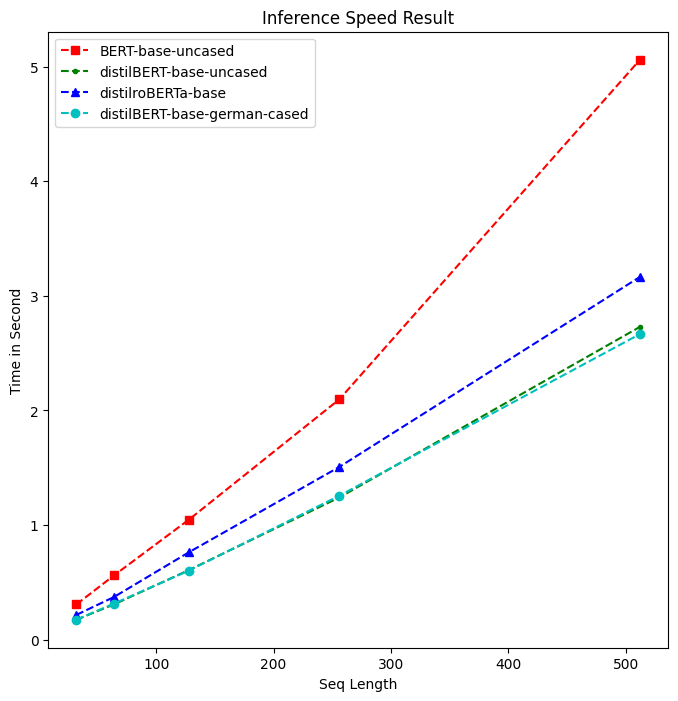

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
t=sequence_lengths
models_perf=[list(results.time_inference_result[m]['result'][batch_sizes[0]].values())for m in models]
plt.xlabel('Seq Length')
plt.ylabel('Time in Second')
plt.title('Inference Speed Result')
plt.plot(t, models_perf[0], 'rs--', t, models_perf[1], 'g--.', t, models_perf[2], 'b--^', t, models_perf[3], 'c--o')
plt.legend(models)
plt.show()
